# Маслова Анна ПМ17-1
## Билет № 3

# 1


Построить "one-hot encoding" для одномерного массива numpy из целых неотрицательных чисел (длина массива и максимальное значение в массиве заранее неизвестно). Протестировать свое решение на случайно сгенерированном одномерном массиве, соответствующем условию.
Пример "one-hot encoding": для вектора `np.array([2, 3, 2, 2, 2, 1])` ожидается результат:  
Решить задачу средствами numpy и/или pandas. Не использовать циклы и конструкции стандартного Python там, где можно использовать возможности данных библиотек.   


In [1]:
import numpy as np

In [2]:
# функция "one-hot encoding"

def one_hot_enc(array):
# ищем "основание" для "one-hot encoding"
    nb_classes = array.max()+1
# составляем единичную матрицу по размерности основания, но индексируем по нашему массиву
    one_hot_targets = np.eye(nb_classes)[array] 

    # результат (все без первого нулевого столбца)
    return one_hot_targets[:,1:]

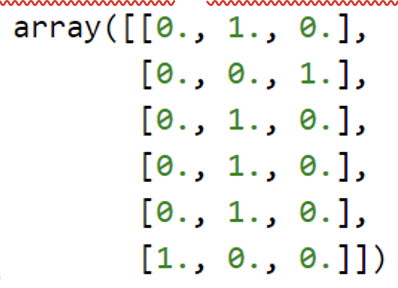

In [3]:
# проверка функции на примере

one_hot_enc(array = np.array([2, 3, 2, 2, 2, 1]))

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

Вывод: результат работы функции совпадает с ответом из условия, значит функция работает правильно. 

In [4]:
# устанавливаем макс значение и длину будущего массива
max_num = 5
len_num = 10

In [5]:
# создаем массив с рандомными неотрицальными числами
arr = np.random.randint(low = 0,
                       high = max_num+1, #+1 тк верхняя граница не входит
                       size = len_num)
arr[:10]

array([3, 5, 5, 4, 3, 2, 1, 5, 5, 0])

Ответ для рандомного массива:

In [6]:
# работа функции на рандомном массиве
one_hot_enc(arr)

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

# 2


Датасет: Chinook_Sqlite.sqlite. С помощью кода на Python с использованием sqlite3 и SQL решить задачу. Реализовать функции на Python:
1. Которая по имени исполнителя возвращает все его альбомы. 
2. Которая по имени исполнителя и имени альбома возвращает количество треков в альбоме и их суммарную продолжительность.

In [7]:
import sqlite3
import pandas as pd

In [8]:
path = 'exam/'

In [9]:
# подключаем базу данных
con = sqlite3.connect(path + 'Chinook_Sqlite.sqlite')
cur  =  con.cursor() 

Которая по имени исполнителя возвращает все его альбомы.

In [10]:
# сюда будем вводить имя исполнителя
val = (str(input()),) #Accept

# выбираем имя исполнителя и название альбома из соединенной таблице по условию where
sql = '''
SELECT art.Name, al.title
FROM Album as al 
join Artist as art on al.artistid = art.ArtistId
WHERE art.Name = ?
'''

# выполняем, вставляя введенное с клавиатуры значение
data = cur.execute(sql, val)

# отображаем результат
display(pd.DataFrame(data,
                     columns = ['Artist', 'Album_Name']))

Accept


,Artist,Album_Name
0,Accept,Balls to the Wall
1,Accept,Restless and Wild


Которая по имени исполнителя и имени альбома возвращает количество треков в альбоме и их суммарную продолжительность.

In [11]:
# пустой список для данных с клавиатуры
val_listik = []

# вводим что надо
val_listik += [input('введите имя исполнителя: ')] #Accept
val_listik += [input('введите имя альбома: ')] #Restless and Wild

введите имя исполнителя: Accept
введите имя альбома: Restless and Wild


In [12]:
# из трех объединенных таблиц берем что надо + отбираем по условию 
cur.execute( f'''
SELECT 
al.Title, art.Name, SUM(tr.Milliseconds), COUNT(tr.TrackId) 
FROM Track AS tr
JOIN Album AS al ON al.AlbumId = tr.AlbumId 
JOIN Artist AS art ON art.artistid = al.ArtistId
WHERE art.Name = "{val_listik[0]}" AND al.Title = "{val_listik[1]}"
''')

# выполняем
data = cur.fetchall() 

# отображаем
display(pd.DataFrame(data, 
                     columns = ['Album_Name','Artist_Name','MilliSeconds','Total_Tracks']))

,Album_Name,Artist_Name,MilliSeconds,Total_Tracks
0,Restless and Wild,Accept,858088,3


In [13]:
cur.close() # Закрываем объект-курсор 
con.close() # Закрываем соединение

# 3


Подсчитать, сколько раз встречается каждое из личных местоимений в именительном падеже (полный список: я, ты, он, она, оно, мы, вы, они) в текстовых файлах, лежащих в папке: all_k.zip. 
Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).

In [14]:
import dask.bag as db
from razdel import tokenize

In [15]:
path = 'exam/'

In [16]:
# в даск бэг складываем все файлы с правильной кодировкой
all_k = db.read_text(path + 'all_k/*', encoding = "CP1251")

In [17]:
# проверяем что файлов 597
all_k.npartitions

597

In [18]:
# посмотрим как оно читается
all_k.take(10)

('         Хулио Кортасар\n',
 '       \n',
 '         62. Модель для сборки\n',
 '       \n',
 '          \n',
 '       \n',
 '         Многие читатели, наверно, заметят, что в этом произведении я  кое-где\n',
 '      преступаю литературные условности. Приведу лишь несколько примеров:  ар-\n',
 '      гентинцы у меня то и дело переходят с "вы" на "ты", когда  это  для  них\n',
 '      естественно в диалоге; житель  Лондона,  только  недавно  бравший  уроки\n')

In [19]:
'''функция, которая будет делить предложения на слова
tokenize(s) возвращает не просто список, а генератор, 
поэтому нужно еще выбрать только слова из него'''

def tokens(s):
    return [_.text for _ in list(tokenize(s))]

In [20]:
%%time

(all_k.str.lower().map(tokens) # к нижнему регистру и разбивка по словам
 .flatten() # делаем плоский список
 .filter(lambda word: word in ['я', 'ты', 'он', 'она', 'оно', 'мы', 'вы', 'они']) # отбираем только личные местоимения
 .frequencies(sort = True) # считаем частоту и сортируем
 .compute())

CPU times: user 2.97 s, sys: 299 ms, total: 3.27 s
Wall time: 1min 33s


[('он', 628210),
 ('я', 568289),
 ('она', 374784),
 ('ты', 211919),
 ('они', 155474),
 ('вы', 143992),
 ('мы', 122332),
 ('оно', 16597)]

Вывод: чаще всего повторялось местоимение `он` и реже всего — `оно`.

In [21]:
from nltk.tokenize import word_tokenize

In [22]:
%%time

(all_k.str.lower().map(word_tokenize) # к нижнему регистру и разбивка по словам
 .flatten() # делаем плоский список
 .filter(lambda word: word in ['я', 'ты', 'он', 'она', 'оно', 'мы', 'вы', 'они']) # отбираем только личные местоимения
 .frequencies(sort = True) # считаем частоту и сортируем
 .compute())

CPU times: user 2.55 s, sys: 324 ms, total: 2.88 s
Wall time: 2min 13s


[('он', 627341),
 ('я', 564289),
 ('она', 374359),
 ('ты', 211589),
 ('они', 155388),
 ('вы', 143766),
 ('мы', 122239),
 ('оно', 16574)]

Вывод: `razdel` для русских текстов посчитал точнее и быстрее, чем `nltk`.